In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("StudentsPerformance.csv")  

print(df.head(5))
print(df.info())
print(df.describe())
print(df.columns)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


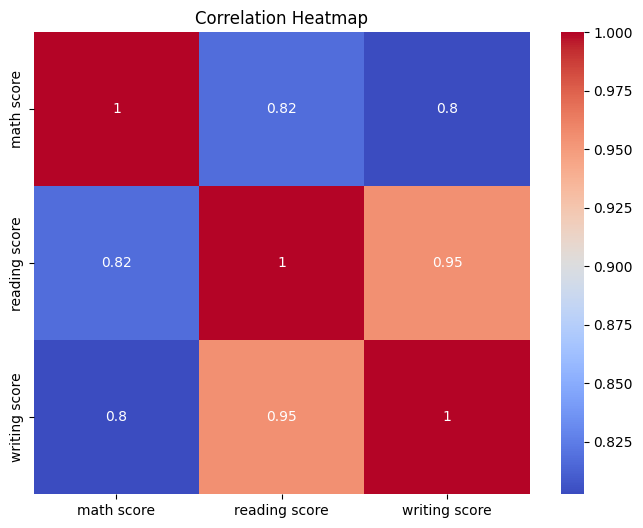

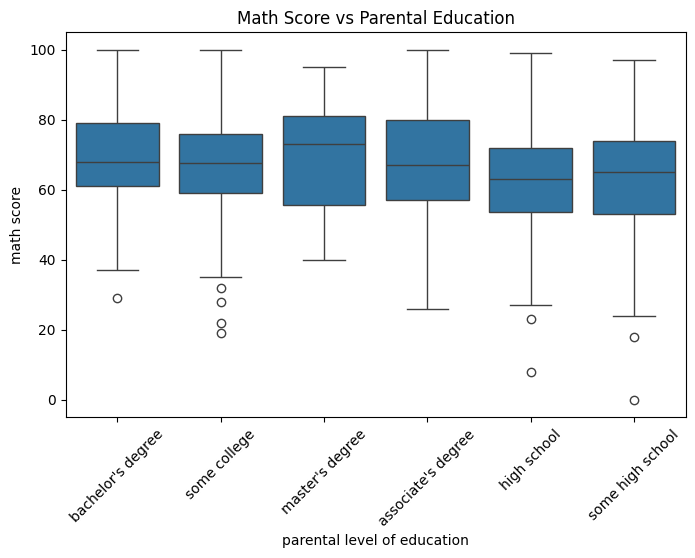

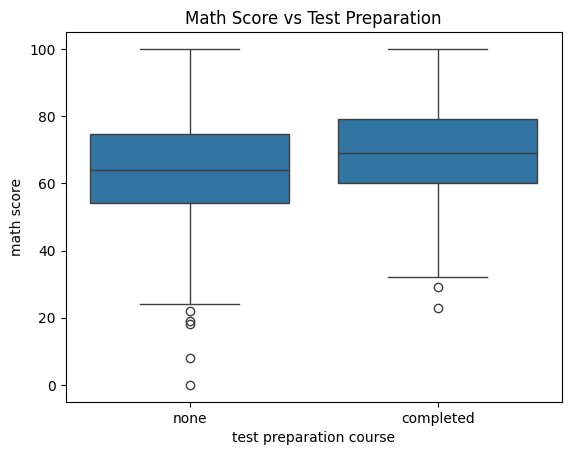

In [51]:
print("Missing values:\n", df.isnull().sum())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()

sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score vs Test Preparation")
plt.show()


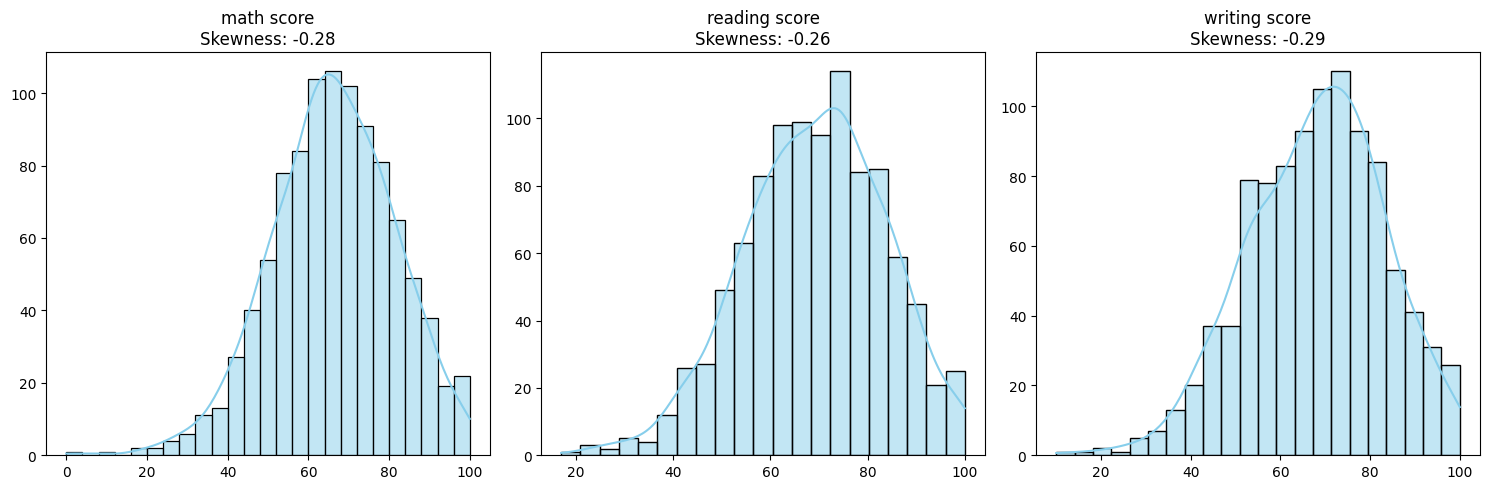

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
plt.figure(figsize=(15, 5))

# Plot each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


<Axes: xlabel='reading score', ylabel='math score'>

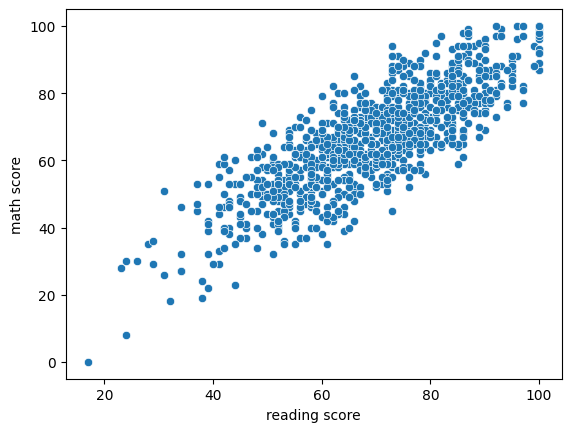

In [53]:
sns.scatterplot(x='reading score', y='math score', data=df)

In [54]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Step 1: Load your dataset
df = pd.read_csv("StudentsPerformance.csv")  # change filename if needed

# Step 2: Separate input (X) and output (y)
X = df.drop(columns=['math score'])   # Target variable
y = df['math score']

# Step 3: Encode categorical columns
categorical_features = ['parental level of education', 'test preparation course']

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'  # Keep the other columns as they are
)

X_encoded = ct.fit_transform(X)

print("✅ Encoding complete!")
print("Encoded feature array shape:", X_encoded.shape)
print("First 5 rows after encoding:\n", X_encoded[:5])

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("\n✅ Data split complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ Encoding complete!
Encoded feature array shape: (1000, 11)
First 5 rows after encoding:
 [[1.0 0.0 0.0 0.0 0.0 1.0 'female' 'group B' 'standard' 72 74]
 [0.0 0.0 0.0 1.0 0.0 0.0 'female' 'group C' 'standard' 90 88]
 [0.0 0.0 1.0 0.0 0.0 1.0 'female' 'group B' 'standard' 95 93]
 [0.0 0.0 0.0 0.0 0.0 1.0 'male' 'group A' 'free/reduced' 57 44]
 [0.0 0.0 0.0 1.0 0.0 1.0 'male' 'group C' 'standard' 78 75]]

✅ Data split complete!
X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


✅ R² Score: 0.8804332983749565
Intercept: -10.91249720941019

Feature influence on math score:
                                              Feature  Coefficient
0                                encoder__gender_male    13.064884
4                     encoder__race/ethnicity_group E     4.892649
10                            encoder__lunch_standard     3.510075
11              encoder__test preparation course_none     3.289642
7   encoder__parental level of education_master's ...    -1.400489
8   encoder__parental level of education_some college     0.998856
6    encoder__parental level of education_high school     0.929312
9   encoder__parental level of education_some high...     0.756470
13                           remainder__writing score     0.724148
5   encoder__parental level of education_bachelor'...    -0.716901
2                     encoder__race/ethnicity_group C    -0.625617
3                     encoder__race/ethnicity_group D    -0.613236
1                     encoder__rac

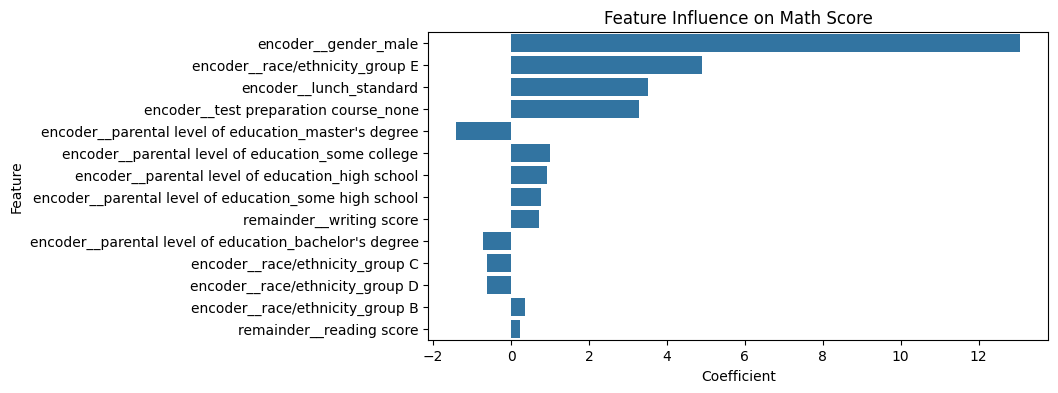

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("StudentsPerformance.csv")

X = df.drop("math score", axis=1)
y = df["math score"]

categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'  
)

X_encoded = ct.fit_transform(X)
encoded_feature_names = ct.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("✅ R² Score:", r2)
print("Intercept:", model.intercept_)

coef_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature influence on math score:")
print(coef_df)

plt.figure(figsize=(8,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Influence on Math Score")
plt.show()


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

df = pd.read_csv("StudentsPerformance.csv")

X = df.drop("math score", axis=1)
y = df["math score"]

categorical = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical = ['reading score', 'writing score']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='passthrough')

model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)                

y_pred = model.predict(X_test)
print("✅ Model trained successfully!")
print(f"R² Score: {r2_score(y_test, y_pred)}")

sample = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group B'],
    'parental level of education': ['bachelor\'s degree'],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'reading score': [80],
    'writing score': [78]
})

predicted_score = model.predict(sample)
print(f"\n🎯 Predicted Math Score: {predicted_score[0]:.2f}")


✅ Model trained successfully!
R² Score: 0.8804332983749565

🎯 Predicted Math Score: 67.61


In [57]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

n = X_test.shape[0]  
p = X_test.shape[1]  

adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R² Score: {adj_r2:.4f}")


R² Score: 0.8804
Adjusted R² Score: 0.8761
